In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.1-cp313-cp313-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp313-cp313-macosx_14_0_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.7.1-cp313-cp313-macosx_10_13_x86_64.whl (9.2 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.16.1-cp313-cp313-macosx_14_0_x86_64.whl (23.5 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [seaborn]m4/5 [seaborn]earn]
Note: you may need to restart the kernel to use updated packages.


In [4]:
holdings = {
    "AAPL": 0.527141, 
    "CMG": 1.943039, 
    "NVDA": 0.5050785,
    "RR.L": 0.169452464,
    "CNDX.L": 0.2060825,
    "JPM": 1.0610443,
    "VWRP.L": 10.6251097,
    "VUAG.L": 30.853993
}


purchase_dates = {
    "AAPL": "2024-12-09",
    "CMG": "2024-12-09",
    "NVDA": "2025-01-25", 
    "RR.L": "2024-12-09",
    "CNDX.L": "2024-12-09",
    "JPM": "2024-12-17",
    "VWRP.L": "2024-12-09",
    "VUAG.L": "2024-12-09"
}

import datetime as dt
purchase_dates_dt = {ticker: dt.datetime.strptime(date, "%Y-%m-%d") for ticker, date in purchase_dates.items()}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

portfolio_data = pd.read_csv('converted_portfolio_data.csv')
portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'])
print("Portfolio data shape:", portfolio_data.shape)
portfolio_data.head()

Portfolio data shape: (426, 68)


,Date,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,AAPL_Dividends,AAPL_Stock Splits,VUAG.L_Open,...,RR.L_Stock Splits,VWRP.L_Open,VWRP.L_High,VWRP.L_Low,VWRP.L_Close,VWRP.L_Adj Close,VWRP.L_Volume,VWRP.L_Dividends,VWRP.L_Stock Splits,VWRP.L_Capital Gains
0,2024-01-02,141.848469,142.826219,139.377589,140.703984,139.522733,6.252149e+07,0.0,0.0,70.620003,...,0.0,93.089996,93.110001,92.550003,92.930000,92.930000,78312.0,0.0,0.0,0.0
1,2024-01-03,139.627711,140.885894,139.028932,139.650448,138.478067,4.427469e+07,0.0,0.0,70.580002,...,0.0,92.720001,92.959999,91.919998,92.040001,92.040001,54337.0,0.0,0.0,0.0
2,2024-01-04,138.058769,138.771235,137.096194,137.876871,136.719363,5.455925e+07,0.0,0.0,69.889999,...,0.0,91.839996,92.089996,91.570000,92.000000,92.000000,65386.0,0.0,0.0,0.0
3,2024-01-05,137.937508,138.521113,136.558051,137.323567,136.170708,4.728007e+07,0.0,0.0,69.540001,...,0.0,91.480003,91.739998,91.349998,91.570000,91.570000,58439.0,0.0,0.0,0.0
4,2024-01-08,138.013295,140.673672,137.566113,140.643348,139.462605,4.482798e+07,0.0,0.0,69.470001,...,0.0,91.389999,91.720001,91.210999,91.629997,91.629997,66600.0,0.0,0.0,0.0


In [ ]:

assets = list(holdings.keys())
closing_prices = {}

for asset in assets:
    
    close_col = f"{asset}_Close"
    if close_col in portfolio_data.columns:
        closing_prices[asset] = portfolio_data[['Date', close_col]].rename(columns={close_col: 'Close'})
    else:
        print(f"Warning: {close_col} not found in data")

print(f"Data range for {assets[0]}: {closing_prices[assets[0]]['Date'].min()} to {closing_prices[assets[0]]['Date'].max()}")
closing_prices[assets[0]].head()

Data range for AAPL: 2024-01-02 00:00:00 to 2025-08-27 00:00:00


,Date,Close
0,2024-01-02,140.703984
1,2024-01-03,139.650448
2,2024-01-04,137.876871
3,2024-01-05,137.323567
4,2024-01-08,140.643348


In [ ]:

daily_returns = {}
for asset in assets:
    if asset in closing_prices:
        
        df = closing_prices[asset].copy()
        df['Return'] = df['Close'].pct_change() * 100  
        df = df.dropna()  
        daily_returns[asset] = df


def calculate_monthly_returns(asset_data):
    
    monthly_data = asset_data.set_index('Date')
    monthly_data = monthly_data.resample('M').last()
    monthly_returns = monthly_data['Close'].pct_change() * 100
    return pd.DataFrame({'Date': monthly_returns.index, 'Monthly_Return': monthly_returns.values}).dropna()


monthly_returns = {asset: calculate_monthly_returns(daily_returns[asset]) for asset in daily_returns}
print(f"Monthly returns for {assets[0]}:")
monthly_returns[assets[0]].head()

Monthly returns for AAPL:


/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_43086/2038664589.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['Close'].pct_change() * 100  # in percentage
/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_43086/2038664589.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Return'] = df['Close'].pct_change() * 100  # in percentage
/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_43086/2038664589.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in an

,Date,Monthly_Return
1,2024-02-29,-1.979389
2,2024-03-31,-5.128633
3,2024-04-30,-0.670629
4,2024-05-31,12.869135
5,2024-06-30,9.555264


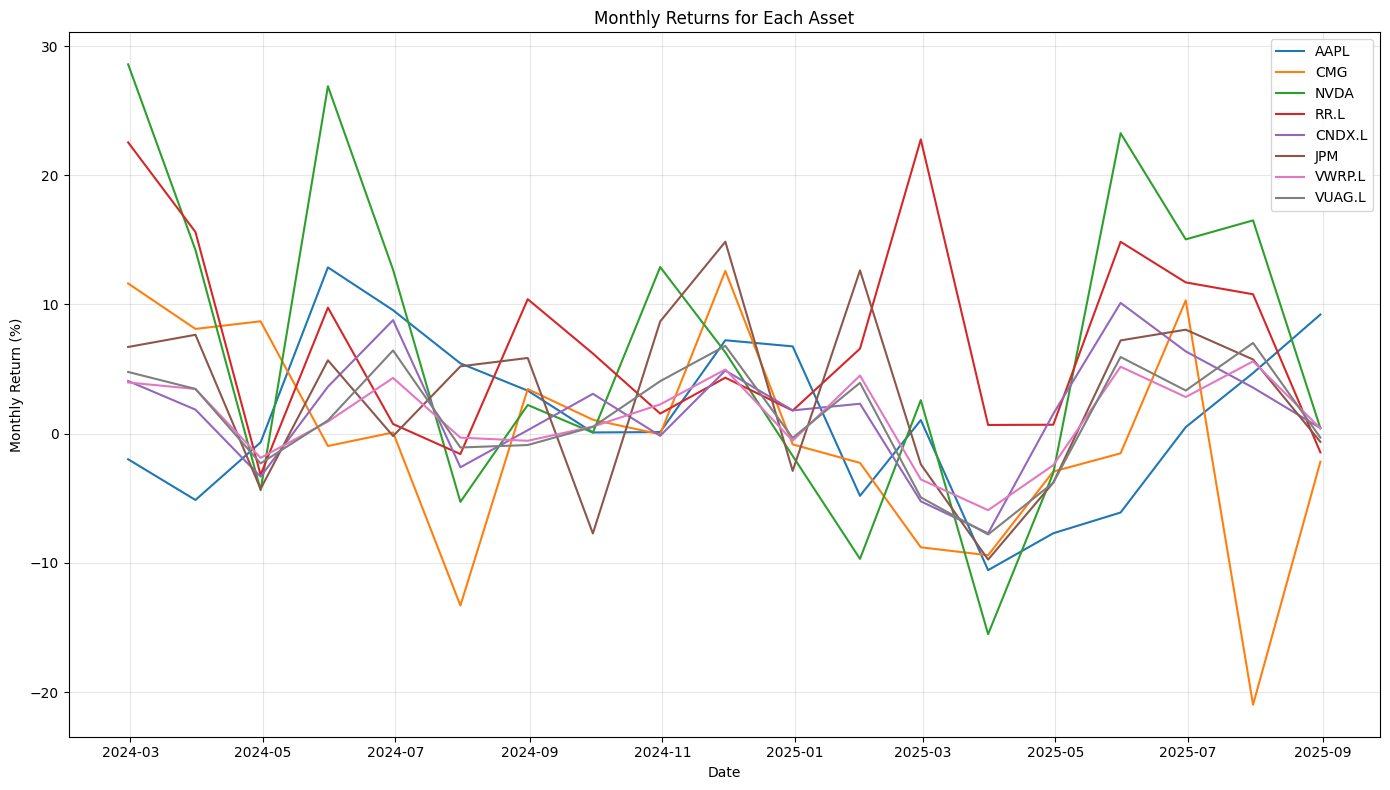

,Asset,Avg Monthly Return (%),Monthly Volatility (%)
0,AAPL,1.259447,6.393362
1,CMG,-0.378751,8.681373
2,NVDA,6.423567,12.404134
3,RR.L,7.094719,7.866357
4,CNDX.L,1.774901,4.445198
5,JPM,2.984771,6.811766
6,VWRP.L,1.253959,3.263888
7,VUAG.L,1.365053,4.236750


In [ ]:

plt.figure(figsize=(14, 8))
for asset in assets:
    if asset in monthly_returns:
        plt.plot(monthly_returns[asset]['Date'], monthly_returns[asset]['Monthly_Return'], label=asset)
        
plt.title('Monthly Returns for Each Asset')
plt.xlabel('Date')
plt.ylabel('Monthly Return (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


avg_returns = {}
volatility = {}

for asset in assets:
    if asset in monthly_returns:
        avg_returns[asset] = monthly_returns[asset]['Monthly_Return'].mean()
        volatility[asset] = monthly_returns[asset]['Monthly_Return'].std()


returns_df = pd.DataFrame({
    'Asset': assets,
    'Avg Monthly Return (%)': [avg_returns.get(asset, float('nan')) for asset in assets],
    'Monthly Volatility (%)': [volatility.get(asset, float('nan')) for asset in assets]
})

returns_df

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

def build_prediction_model(asset_data):
    
    df = asset_data.copy()

    
    for i in range(1, 4):
        df[f'lag_{i}'] = df['Monthly_Return'].shift(i)
    
    
    df = df.dropna()
    
    if len(df) < 5:  
        return None, None
    
    
    X = df[['lag_1', 'lag_2', 'lag_3']]
    y = df['Monthly_Return']
    
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    
    last_returns = asset_data['Monthly_Return'].tail(3).values
    if len(last_returns) < 3:
        return None, None
    
    return model, last_returns


models = {}
last_data = {}

for asset in assets:
    if asset in monthly_returns and len(monthly_returns[asset]) >= 4:
        model, last_values = build_prediction_model(monthly_returns[asset])
        if model is not None:
            models[asset] = model
            last_data[asset] = last_values

print(f"Successfully built prediction models for {len(models)} assets")

Successfully built prediction models for 8 assets


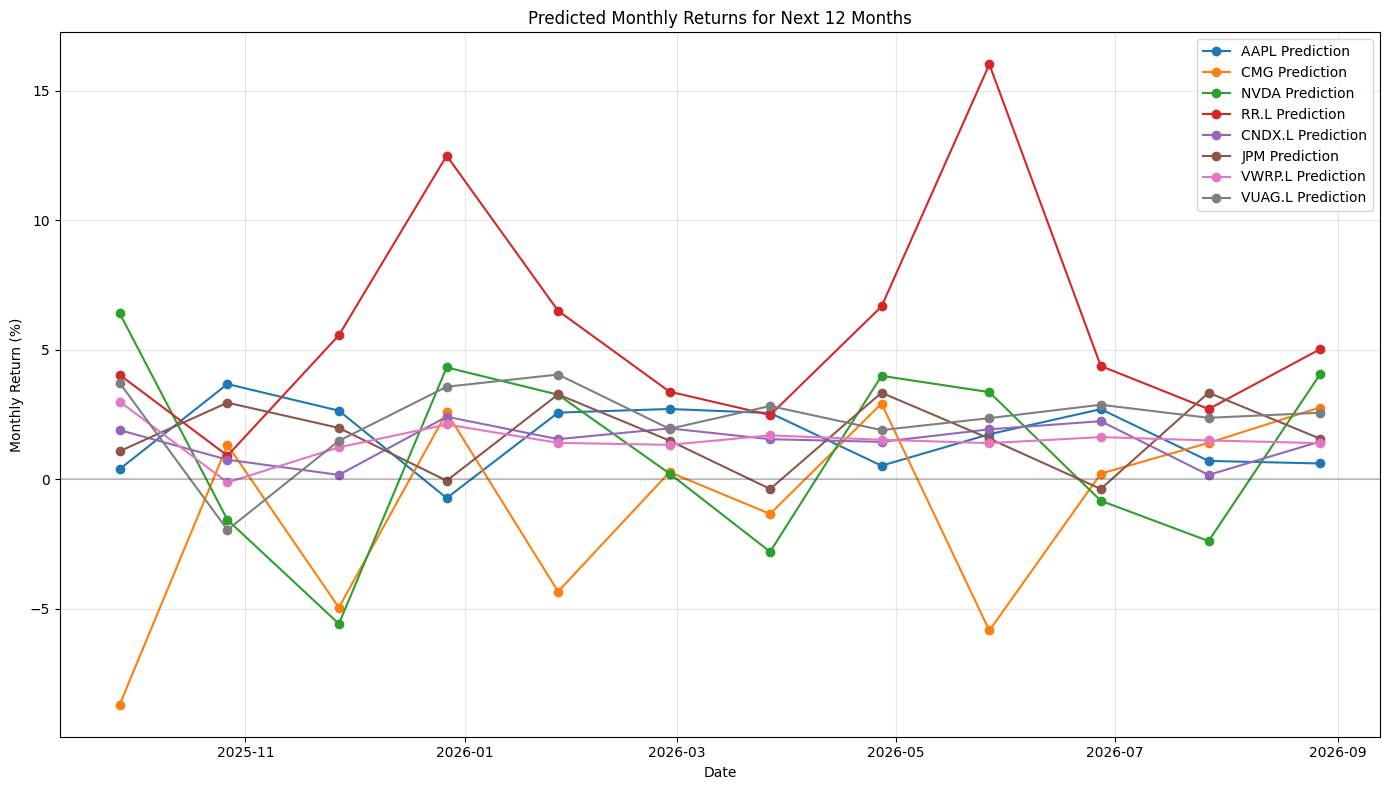

In [ ]:

plt.figure(figsize=(14, 8))
for asset in prediction_dfs:
    plt.plot(prediction_dfs[asset]['Date'], prediction_dfs[asset]['Predicted_Return'], 
             label=f"{asset} Prediction", marker='o')

plt.title('Predicted Monthly Returns for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Monthly Return (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()

In [ ]:

current_prices = {}
for asset in assets:
    if asset in closing_prices:
        current_prices[asset] = closing_prices[asset]['Close'].iloc[-1]
        
print("Current prices (as of", portfolio_data['Date'].max().strftime('%Y-%m-%d'), "):")
for asset, price in current_prices.items():
    print(f"{asset}: £{price:.2f}")


current_portfolio_value = sum(holdings[asset] * current_prices[asset] for asset in assets if asset in current_prices)
print(f"\nCurrent portfolio value: £{current_portfolio_value:.2f}")

for asset in future_predictions:
    if asset in holdings:
        monthly_returns_dec = [r/100 + 1 for r in future_predictions[asset]]
    
    cumulative_return = np.prod(monthly_returns_dec) - 1
    cumulative_returns[asset] = cumulative_return * 100  

cumulative_returns_df = pd.DataFrame({
    'Asset': list(cumulative_returns.keys()),
    'Cumulative Return (%)': [cumulative_returns[asset] for asset in cumulative_returns],
    'Holdings': [holdings[asset] for asset in cumulative_returns],
    'Current Value (£)': [holdings[asset] * current_prices[asset] if asset in current_prices else 0 
                         for asset in cumulative_returns]
})

cumulative_returns_df

Current prices (as of 2025-08-27 ):
AAPL: £171.00
CMG: £31.64
NVDA: £134.73
RR.L: £1056.50
CNDX.L: £1348.00
JPM: £222.04
VWRP.L: £117.96
VUAG.L: £92.09

Current portfolio value: £5006.78


,Asset,Cumulative Return (%),Holdings,Current Value (£)
0,AAPL,21.957362,0.527141,90.142609
1,CMG,-13.594568,1.943039,61.482539
2,NVDA,12.354699,0.505078,68.049661
3,RR.L,95.907035,0.169452,179.026528
4,CNDX.L,18.962371,0.206083,277.799210
5,JPM,21.568864,1.061044,235.593030
6,VWRP.L,19.630797,10.625110,1253.337930
7,VUAG.L,31.332609,30.853993,2841.344102


In [ ]:

future_values = {}
for asset in cumulative_returns:
    if asset in current_prices and asset in holdings:
        future_price = current_prices[asset] * (1 + cumulative_returns[asset]/100)
        future_values[asset] = holdings[asset] * future_price

total_future_value = sum(future_values.values())

summary_df = pd.DataFrame({
    'Asset': list(future_values.keys()),
    'Current Price (£)': [current_prices[asset] for asset in future_values],
    'Holdings': [holdings[asset] for asset in future_values],
    'Current Value (£)': [holdings[asset] * current_prices[asset] for asset in future_values],
    'Projected Return (%)': [cumulative_returns[asset] for asset in future_values],
    'Projected Price (£)': [current_prices[asset] * (1 + cumulative_returns[asset]/100) for asset in future_values],
    'Projected Value (£)': [future_values[asset] for asset in future_values]
})

summary_df.loc['Total'] = ['', '', '', summary_df['Current Value (£)'].sum(), '', '', summary_df['Projected Value (£)'].sum()]
summary_df
portfolio_return = (total_future_value / current_portfolio_value - 1) * 100
print(f"\nCurrent Portfolio Value: £{current_portfolio_value:.2f}")
print(f"Projected Portfolio Value (12 months): £{total_future_value:.2f}")
print(f"Projected Portfolio Return: {portfolio_return:.2f}%")


Current Portfolio Value: £5006.78
Projected Portfolio Value (12 months): £6438.12
Projected Portfolio Return: 28.59%


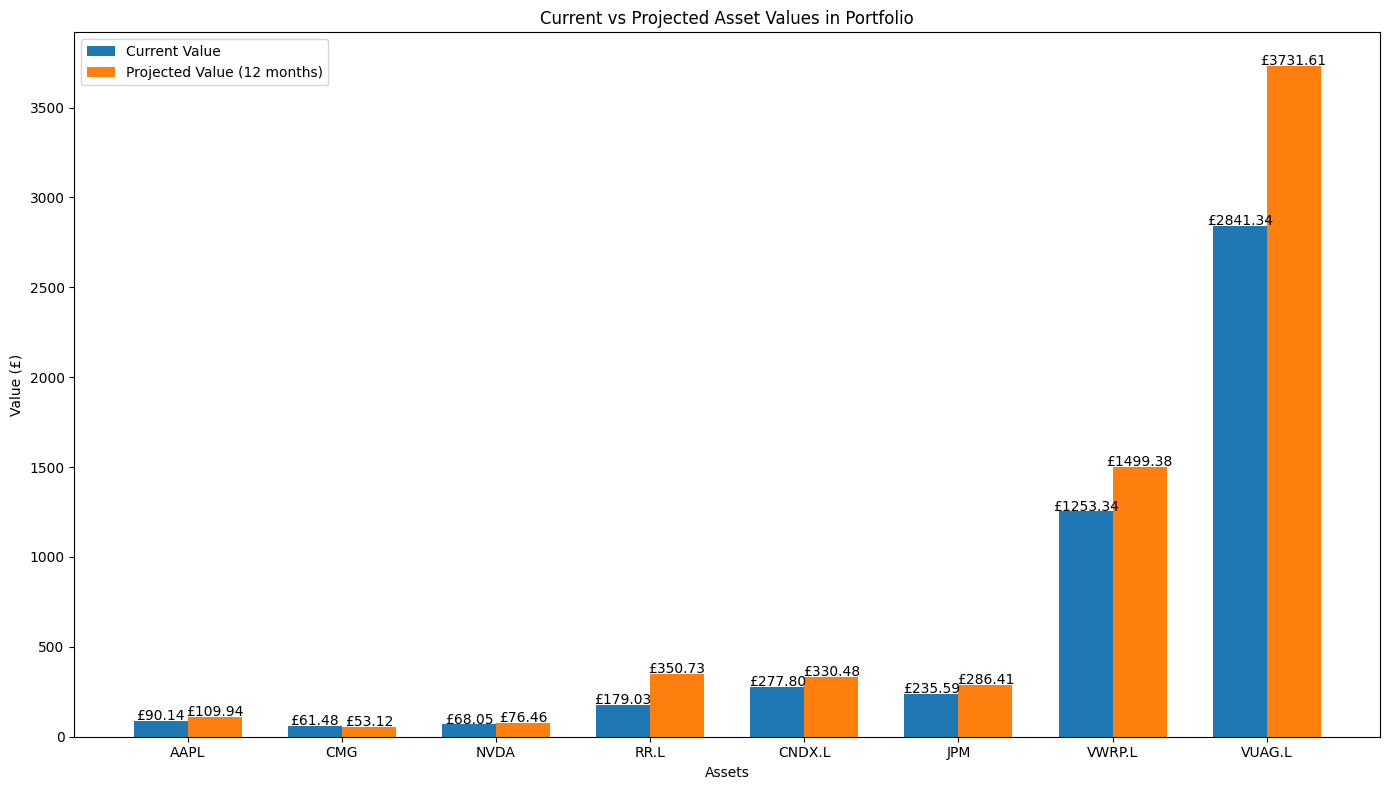

In [ ]:

assets_list = list(future_values.keys())
current_values = [holdings[asset] * current_prices[asset] for asset in assets_list]
projected_values = [future_values[asset] for asset in assets_list]


plt.figure(figsize=(14, 8))
width = 0.35
x = np.arange(len(assets_list))

plt.bar(x - width/2, current_values, width, label='Current Value')
plt.bar(x + width/2, projected_values, width, label='Projected Value (12 months)')

plt.xlabel('Assets')
plt.ylabel('Value (£)')
plt.title('Current vs Projected Asset Values in Portfolio')
plt.xticks(x, assets_list)
plt.legend()

# Add value labels on top of bars
for i, v in enumerate(current_values):
    plt.text(i - width/2, v + 5, f"£{v:.2f}", ha='center')

for i, v in enumerate(projected_values):
    plt.text(i + width/2, v + 5, f"£{v:.2f}", ha='center')

plt.tight_layout()
plt.show()
